# Lab: Titanic

### Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew (32% survival rate). This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, complete the analysis of what sorts of people were likely to survive. In particular, apply the tools of machine learning to predict which passengers survived the tragedy.

### Overview

Split the data into training and test sets.

The **training** set should be used to build your machine learning models. Your model will be based on “features” like the passengers’ gender and class. You can also use feature engineering to create new features. Use your trained model to predict whether or not an individual survived the sinking of the Titanic. The **test** set should be used to see how well your model performs on unseen data. 

### Data Dictionary

Survived: 0 = No, 1 = Yes

Pclass: class 1 = 1st, 2 = 2nd, 3 = 3rd 

Sex: gender

Age: Age in years 

SibSp: # of siblings / spouse aboard the Titanic

Parch: # of parents / children aboard the Titanic 

Ticket: ticket number

Fare: Passenger fare 

Cabin: Cabin number 

Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


   **Variable Notes**
   
pclass: A proxy for socio-economic status (SES)
1st = Upper,
2nd = Middle,
3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

SibSp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister;  Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
Parent = mother, father;
Child = daughter, son, stepdaughter, stepson;
Some children travelled only with a nanny, therefore Parch=0 for them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Inspect the features
Note which are numerical and which are categorical.

### Distribution of numerical features
Check for outliers.

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check for missing values
Which features can be dropped?
Which features may we want to complete/impute?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Distribution of categorical features

In [5]:
df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Panula, Master. Eino Viljami",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


### Drop poor features

In [6]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Exploratory Data Analysis

How may passengers survived?

In [7]:
df["Survived"].sum()

342

## Univariate (single variable)

### Bar Chart

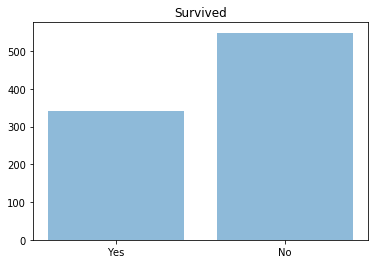

In [8]:
fig, ax = plt.subplots()

survived = df.loc[df["Survived"]==1, "Survived"].count()
not_survived = df.loc[df["Survived"]==0, "Survived"].count()

plt.bar([0,1], [survived, not_survived], align='center', alpha=0.5)
plt.xticks([0,1], ['Yes', 'No'])

plt.title('Survived')

plt.show()

### Histogram

C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


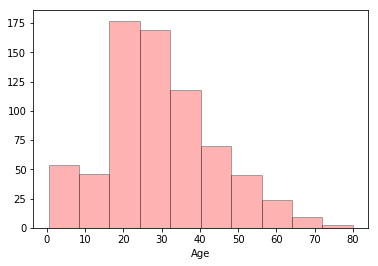

In [9]:
fig, ax = plt.subplots()
ax.hist(df['Age'],  color='red', alpha=.3, edgecolor='black', bins=10)
ax.set(xlabel="Age")

plt.show()

### Box Plot

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(df.loc[(df.Age.notnull()) & (df["Survived"] == 0),'Age'])
ax.set(title="Age")
plt.show()

## Bivariate (joint distributions)

### Histogram

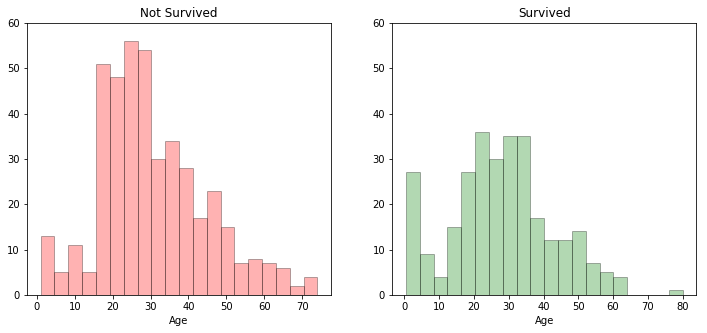

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].hist(df.loc[(df.Age.notnull()) & (df["Survived"] == 0),'Age'],  color='red', alpha=.3, edgecolor='black', bins=20)
ax[0].set(xlabel="Age", title="Not Survived", ylim=(0,60))
ax[1].hist(df.loc[(df.Age.notnull()) & (df["Survived"] == 1),'Age'],  color='green', alpha=.3, edgecolor='black', bins=20)
ax[1].set(xlabel="Age", title="Survived", ylim=(0,60))
plt.show()

### Visualize the "Parch" and "SibSp" distributions

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].hist(df['Parch'],  alpha=.3, color = 'red', edgecolor='black', bins=[0,1,2,3,4,5,6,7])
ax[0].set(title="Titanic", xlabel='Parch')
ax[1].hist(df.loc[df.Age.notnull(),'SibSp'],  alpha=.3, edgecolor='black', bins=[0,1,2,3,4,5,6,7,8])
ax[1].set(title="Titanic", xlabel='SibSp',ylim=(0,700) )
plt.show()

### Density Plot

C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


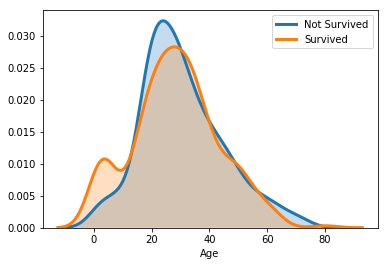

In [11]:
sns.distplot(df.loc[(df.Age.notnull()) & (df["Survived"] == 0),'Age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Not Survived")
sns.distplot(df.loc[(df.Age.notnull()) & (df["Survived"] == 1),'Age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Survived")

### Box Plot

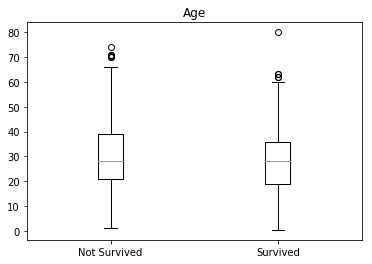

In [12]:
fig, ax = plt.subplots()
not_survived = df.loc[(df.Age.notnull()) & (df["Survived"] == 0),'Age']
survived = df.loc[(df.Age.notnull()) & (df["Survived"] == 1),'Age']
ax.boxplot([not_survived, survived])
ax.set(xticklabels=['Not Survived', 'Survived'], title="Age")
plt.show()

### Scatter Plot

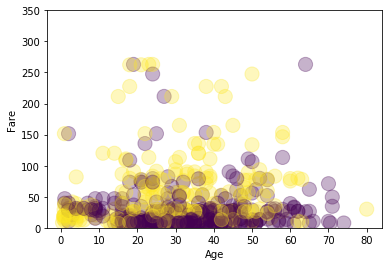

In [13]:
fig, ax = plt.subplots()
ax.scatter(df['Age'], df['Fare'], alpha=0.3,
            s=200, c=df['Survived'], cmap='viridis')
ax.set(xlabel="Age", ylabel="Fare", ylim=(0,350))
plt.show()

### Pair Plot

In [ ]:
import warnings
warnings.filterwarnings('ignore')

pair_plot = sns.pairplot(df, hue='Survived')

# Analyze by grouping (pivoting) features

### Explore relationships between categorical features

In [14]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [16]:
df[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [17]:
df[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)


,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Visualize relationships between multiple categorical features

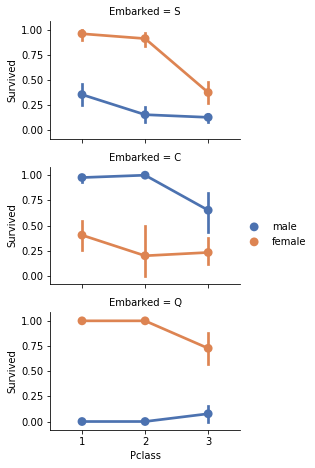

In [19]:
# grid = sns.FacetGrid(df, col='Embarked')
grid = sns.FacetGrid(df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=None, hue_order=None)
grid.add_legend()
plt.show()

### Visualize relationships between categorical and continuous features

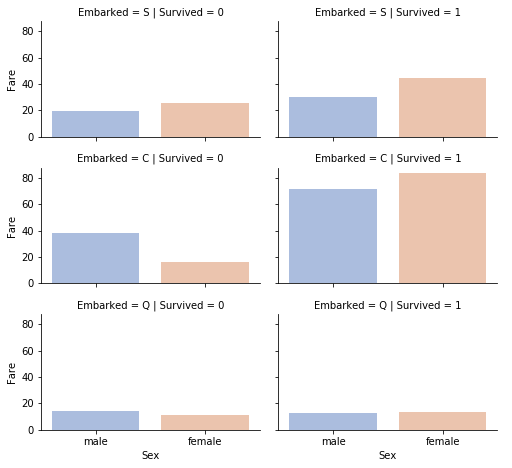

In [18]:
#grid = sns.FacetGrid(df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=["male", "female"], palette="muted")
grid.add_legend()
plt.show()

**Data Analysis:** 
It appears that women, children, the upperclass, and those traveling with at least one other person, but no more than 2, had the best chances to survive the Titanic tragedy.

# Data cleaning and tranformation

### Impute missing values (Embarked)

In [ ]:
df.Embarked.value_counts()

In [ ]:
most_common_port = df.Embarked.value_counts().idxmax()
most_common_port

In [ ]:
df['Embarked'] = df['Embarked'].fillna(most_common_port)
    
df[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

### One-hot encoding "Embarked"

In [ ]:
df.head()

In [ ]:
# use pandas to one-hot encode "Embarked"

# DEFAULTS:
    # prefix_sep='_' 
    # columns=None   ... will encode all columns with categorical variables
    # drop_first=False
# returns a DataFrame

df = pd.get_dummies(df, columns=["Embarked"])
df.head()

### Convert "Sex" to a binary value

In [ ]:
# Converting a categorical feature to a binary one
df["Sex"] = df["Sex"].map({'male':0, 'female':1})

### Impute missing values (Age)

Note: There is a relationship among Age, Gender, and Pclass. 

Perhaps use the mean Age, across sets of Pclass and Gender combinations, to impute missing Ages.  Alternatively, a random value within 1 standard deviation of the mean Age can be used. The median value can also be used

### Imputing with a randomly selected age within 1 standard deviation of its groups mean

In [ ]:
# Males (coded as Sex=0) in First Class (coded as Pclass=1)
Age01_mean = df.loc[(df['Sex']==0) & (df['Pclass']==1), 'Age'].mean()
Age01_std = df.loc[(df['Sex']==0) & (df['Pclass']==1), 'Age'].std()
Age01_mean, Age01_std

In [ ]:
# Males in Second Class
Age02_mean = df.loc[(df['Sex']==0) & (df['Pclass']==2), 'Age'].mean()
Age02_std = df.loc[(df['Sex']==0) & (df['Pclass']==2), 'Age'].std()
Age02_mean, Age02_std

In [ ]:
# Males in Third Class
Age03_mean = df.loc[(df['Sex']==0) & (df['Pclass']==3), 'Age'].mean()
Age03_std = df.loc[(df['Sex']==0) & (df['Pclass']==3), 'Age'].std()
Age03_mean, Age03_std

In [ ]:
# use the mean and std of Males in First Class
# to randomly generate an Age within 1 standard deviation of the mean
Age01_impute = round(np.random.uniform(Age01_mean - Age01_std, Age01_mean + Age01_std))
Age01_impute

*Do the same, as above, for 'females'

In [ ]:
# replace the null values with the imputed age
#df.loc[ (df["Age"].isnull()) & (df.Sex=='male') & (df.Pclass==1),'Age'] = Age01_impute

# Feature Engineering
Perhaps create an "AgeBand" feature by grouping Age within bands (discretization).

In [ ]:
df["Age"].head()

In [ ]:
# Create "AgeBand" feature

df['AgeBand'] = pd.cut(df['Age'], 5)
#df['AgeBand'] = pd.cut(df['Age'], 4)
#df['AgeBand'] = df['AgeBand'] = pd.cut(df['Age'], [0,20,40,60,80])
#df['AgeBand'] = pd.cut(df['Age'], [0,20,40,60,80], labels=["child","adult","middle age","elder"])
#df['AgeBand'] = pd.cut(df['Age'], [0,20,40,60,80], labels=[1,2,3,4])
#df["AgeBand"].head(20)

In [ ]:

df[['AgeBand', 'Survived', "Sex"]].groupby(['AgeBand', "Sex"]).mean().sort_values(by='AgeBand', ascending=True)

Perhaps create a **"FamilySize"** feature, combining "SibSp" and "Parch"

In [ ]:
# Create "FamilySize" feature  and perhaps drop "SibSp" and "Parch"
 
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

Perhaps create an **"IsAlone"** feature using "FamilySize"

In [ ]:
# Create IsAlone feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

df[['IsAlone', 'Survived']].groupby(['IsAlone']).mean()

In [ ]:
df.head()

# Model and predict

**Note:** Scikit-learn will give you an error if you have any NaNs in your data. You must impute or drop them.

In [ ]:
# ...


# Lab Homework 2

Using the Titanic dataset, build the best machine learning model that you can in order to predict whether an individual survived the tragedy.

***Things to consider as you go through the process:***

• Clean and transform the data as you desire

• Summarize, group and/or visualize the data to better understand it

• Split the data into ***training*** and ***test*** sets

• Standardize the data

• Choose 2-5 algorithms and perform 10-fold cross validation on the training set

• Display a boxplot and select the best performing model

• Refine the model -- tune its hyperparameters (manually or using grid search)

• Train the refined model on your **full training set** (no cross validation)   ( model.fit(X_train_std, y_train))

• Test the model on your unseen **test** set ( model.score(X_test_std, y_test) )

• Display the Precision, Recall, and F1 score metrics along with a confusion matrix 

• Be able to explain what the scores and confusion matrix mean regarding your results 

** **A few things to keep in mind to improve classification performance:**

				impute or remove missing values,
                feature selection,
                feature engineering,
                try different algorithms
                
                
                